In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from keras.models import load_model 

### do not run the below cell again after splitting the dataset

In [11]:
# Define root directory
root_dir = 'images'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
 
  try:
    os.mkdir('images')
    os.mkdir('images/validation')
    os.mkdir('images/training')
    os.mkdir('images/training/focus')
    os.mkdir('images/training/unfocus')
    os.mkdir('images/training/drowsy')
    os.mkdir('images/validation/focus')
    os.mkdir('images/validation/unfocus')
    os.mkdir('images/validation/drowsy')    
  except OSError:
    pass

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

images/training
images/validation
images/training/unfocus
images/training/focus
images/training/drowsy
images/validation/unfocus
images/validation/focus
images/validation/drowsy


In [2]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file)>0:
      files.append(filename)
    else:
      print(filename +" is zero length, so ignoring.")

    training_length = int(len(files)*SPLIT_SIZE)
    testing_length = int(len(files)-training_length)
    random_set = random.sample(files,len(files))
    training_set = random_set[0:training_length]
    testing_set = random_set[training_length:]

  for filename in training_set:
    curr_file = SOURCE_DIR + filename
    target_dir = TRAINING_DIR + filename
    copyfile(curr_file,target_dir)

  for filename in testing_set:
    curr_file = SOURCE_DIR + filename
    target_dir = VALIDATION_DIR + filename
    copyfile(curr_file,target_dir)
  pass

 

In [3]:
FOCUS_SOURCE_DIR = "dataset/focus/"
UNFOCUS_SOURCE_DIR = "dataset/unfocus/"
DROWSY_SOURCE_DIR = "dataset/drowsy/"

TRAINING_DIR = 'images/training/'
VALIDATION_DIR = 'images/validation/'

TRAINING_FOCUS_DIR = os.path.join(TRAINING_DIR, "focus/")
VALIDATION_FOCUS_DIR = os.path.join(VALIDATION_DIR, "focus/")

TRAINING_UNFOCUS_DIR = os.path.join(TRAINING_DIR, "unfocus/")
VALIDATION_UNFOCUS_DIR = os.path.join(VALIDATION_DIR, "unfocus/")

TRAINING_DROWSY_DIR = os.path.join(TRAINING_DIR, "drowsy/")
VALIDATION_DROWSY_DIR = os.path.join(VALIDATION_DIR, "drowsy/")


In [5]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_FOCUS_DIR)) > 0:
  for file in os.scandir(TRAINING_FOCUS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_UNFOCUS_DIR)) > 0:
  for file in os.scandir(TRAINING_UNFOCUS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DROWSY_DIR)) > 0:
  for file in os.scandir(TRAINING_DROWSY_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_FOCUS_DIR)) > 0:
  for file in os.scandir(VALIDATION_FOCUS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_UNFOCUS_DIR)) > 0:
  for file in os.scandir(VALIDATION_UNFOCUS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DROWSY_DIR)) > 0:
  for file in os.scandir(VALIDATION_DROWSY_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(FOCUS_SOURCE_DIR, TRAINING_FOCUS_DIR, VALIDATION_FOCUS_DIR, split_size)
split_data(UNFOCUS_SOURCE_DIR, TRAINING_UNFOCUS_DIR, VALIDATION_UNFOCUS_DIR, split_size)
split_data(DROWSY_SOURCE_DIR, TRAINING_DROWSY_DIR, VALIDATION_DROWSY_DIR, split_size)
# Check that the number of images matches the expected output



In [4]:
# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"Original focus's directory has {len(os.listdir(FOCUS_SOURCE_DIR))} images")
print(f"Original unfocus's directory has {len(os.listdir(UNFOCUS_SOURCE_DIR))} images")
print(f"Original drowsy's directory has {len(os.listdir(DROWSY_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_FOCUS_DIR))} images of focus for training")
print(f"There are {len(os.listdir(TRAINING_UNFOCUS_DIR))} images of unfocus for training")
print(f"There are {len(os.listdir(TRAINING_DROWSY_DIR))} images of drowsy for training\n")

print(f"There are {len(os.listdir(VALIDATION_FOCUS_DIR))} images of focus for validation")
print(f"There are {len(os.listdir(VALIDATION_UNFOCUS_DIR))} images of unfocus for validation")
print(f"There are {len(os.listdir(VALIDATION_DROWSY_DIR))} images of drowsy for validation")

Original focus's directory has 12870 images
Original unfocus's directory has 12870 images
Original drowsy's directory has 12870 images

There are 10297 images of focus for training
There are 10297 images of unfocus for training
There are 10297 images of drowsy for training

There are 2574 images of focus for validation
There are 2574 images of unfocus for validation
There are 2574 images of drowsy for validation


In [45]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(400, 400, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 398, 398, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 199, 199, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 197, 197, 64)      36928     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 98, 98, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 48, 48, 128)      

In [38]:
import cv2

# Provide the path to your image here
image_path = "dataset/drowsy/eeg_record33_plot567.png"  # Replace with your actual image path

# Read the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was read successfully
if image is not None:
    # Get the image dimensions (width, height)
    width = image.shape[1]
    height = image.shape[0]

    # Print the image size
    print("Image size:", width, "x", height, "pixels")
else:
    print("Error: Could not read the image.")


Image size: 600 x 600 pixels


In [39]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#if it doesn't work use loss='sparse_categorical_crossentropy'

In [40]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1.0/255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode='categorical',
                                                      target_size=(400, 400)
                                                      )

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=10,
                                                                class_mode='categorical',
                                                                target_size=(400, 400)
                                                                )
  ### END CODE HERE
  return train_generator, validation_generator

In [41]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 30888 images belonging to 3 classes.
Found 7722 images belonging to 3 classes.


In [42]:
# Train the model
with tf.device('/GPU:0'):
    history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 150,
            validation_steps = 50,
            verbose = 2)

Epoch 1/150
100/100 - 22s - loss: 2.5964 - accuracy: 0.3370 - val_loss: 1.1227 - val_accuracy: 0.3420 - 22s/epoch - 215ms/step
Epoch 2/150
100/100 - 21s - loss: 1.1401 - accuracy: 0.3500 - val_loss: 1.1325 - val_accuracy: 0.3200 - 21s/epoch - 211ms/step
Epoch 3/150
100/100 - 21s - loss: 1.1774 - accuracy: 0.3470 - val_loss: 1.0985 - val_accuracy: 0.3520 - 21s/epoch - 213ms/step
Epoch 4/150
100/100 - 20s - loss: 1.1217 - accuracy: 0.3577 - val_loss: 1.0978 - val_accuracy: 0.3060 - 20s/epoch - 199ms/step
Epoch 5/150
100/100 - 20s - loss: 1.1047 - accuracy: 0.3870 - val_loss: 1.0814 - val_accuracy: 0.3580 - 20s/epoch - 203ms/step
Epoch 6/150
100/100 - 20s - loss: 1.0218 - accuracy: 0.4730 - val_loss: 1.0496 - val_accuracy: 0.4580 - 20s/epoch - 200ms/step
Epoch 7/150
100/100 - 20s - loss: 0.9520 - accuracy: 0.5610 - val_loss: 0.8607 - val_accuracy: 0.6100 - 20s/epoch - 200ms/step
Epoch 8/150
100/100 - 20s - loss: 0.9149 - accuracy: 0.6020 - val_loss: 0.8702 - val_accuracy: 0.6260 - 20s/epo

400 x 400 
epochs - 150
dropout - 0.3
shuffling - False

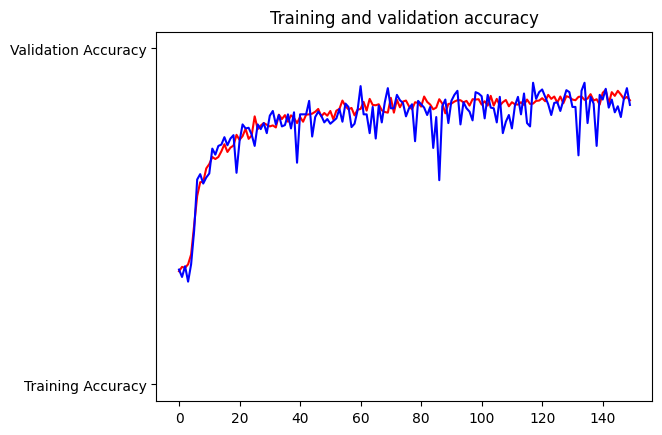

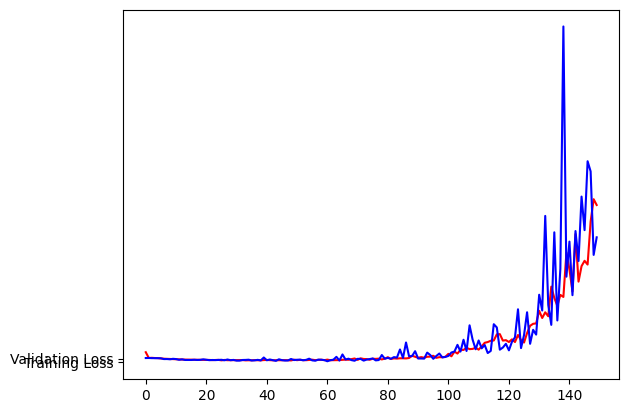

In [43]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [44]:
model.save("my_model_400_150ep.keras") 


In [ ]:
loaded_model = load_model("network.h5") 
loss, accuracy = loaded_model.evaluate(test_data, test_targets) 